### THE SPARKS FOUNDATION 


#### DATA SCIENCE AND BUSINESS ANALYTICS (GRIP JANUARY'22)

#### #TASK1

#### Author - Ronoj De

#### Task Title: Prediction using Supervised ML

#### Objective: It is a simple linear regression task as it involves only 2 variables namely - hours and scores. In this task we have to predict the percentage of an student based upon the number of hours they have studied.

#### Dataset provided: http://bit.ly/w-data

In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
import sklearn 
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [2]:
# Extracting the data from the dataset
data = pd.read_csv("http://bit.ly/w-data")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

### Statistical Analysis of the dataset.

In [6]:
data.shape

(25, 2)

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

#### Let's plot our data points on a 2-D graph to  see if we can manually find any relationship between the data. 

### Plotting using matplotlib

In [9]:
x=data["Hours"]
y=data["Scores"]

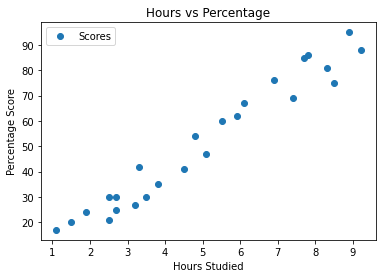

In [10]:
# Plotting the distribution of scores
data.plot(x="Hours",y="Scores", style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [11]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**From the above graph, we can see that there is a positive linear relationship between the 2 variables namely - the number of hours studied and percentage of score.**

### Dividing the data into "attributes" (inputs) and "labels" (outputs).

Dividing the data into “attributes” and “target labels”. Attributes are independent variables, and target labels are dependent variables whose values are to be predicted. In our dataset, we want to predict the percentage of an student based upon the number of hours they have studied.

In [12]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [13]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [14]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Splitting the data into training and test sets.

Now that we have our attributes and labels, the next step is to split this data into training and test sets.

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

The above script splits 80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the proportion of test set.

### Training the Simple Linear Regression model on the Training data

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

### Predicting the Test set results

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [19]:
# Comparing Actual vs Predicted
data1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Visualizing the Training set results

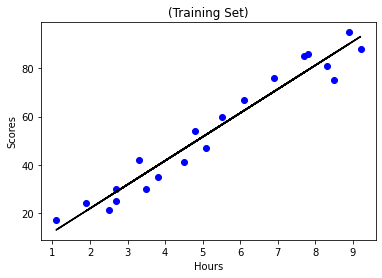

In [20]:
#Plotting the training set
plt.scatter(X_train,y_train, color="blue")
plt.plot(X_train,regressor.predict(X_train), color="black")
plt.title('(Training Set)') 
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Visualizing the Test set results

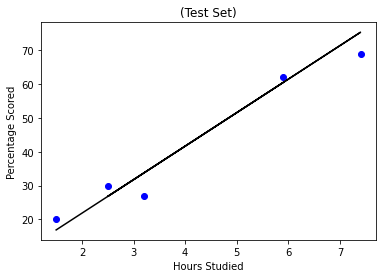

In [21]:
#Plotting the Test set
plt.scatter(X_test,y_test, color="blue")
plt.plot(X_test,regressor.predict(X_test), color="black")
plt.title('(Test Set)') 
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

<AxesSubplot:>

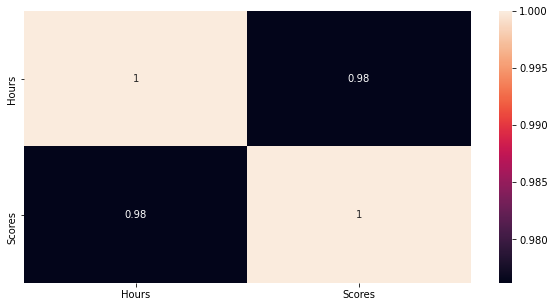

In [22]:
# Checking the correlation 
corr=data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)

### Visualizing the difference between the Actual scores and the Predicted scores

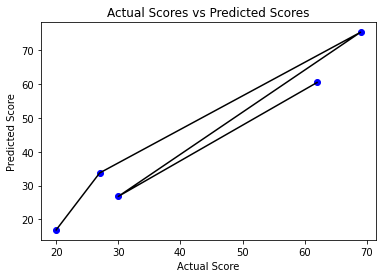

In [23]:
plt.scatter(y_test,y_pred, color="blue")
plt.plot(y_test,y_pred, color="black")
plt.title('Actual Scores vs Predicted Scores')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()

### What will the predicted score if a student studies for 9.25 hrs/day?

### Using the model to do the prediction 

In [24]:
Hours = np.array([[9.25]])
predict=regressor.predict(Hours)
print("Number of Hours = {}".format(Hours))
print("Predicted Score = {}".format(predict[0]))

Number of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### Checking the accuracy of the model 

In [25]:
print("Train: ",regressor.score(X_train,y_train)*100)
print("Test: ",regressor.score(X_test,y_test)*100)

Train:  95.15510725211553
Test:  94.54906892105356


### Evaluation 

The final step is to evaluate the performance of the algorithm. This step is particularly important for comparing the performance of different algorithms on specific data sets. For regression algorithms, three evaluation indicators are usually used:
Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
Mean Squared Error (MSE) is the mean of the squared errors.
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

Mean Squared Error (MSE) The most common metric for regression tasks is MSE. It has a convex shape. It is the average of the squared difference between the predicted and actual value. Since it is differentiable and has a convex shape, it is easier to optimize.

Mean Absolute Error (MAE) This is simply the average of the absolute difference between the target value and the value predicted by the model. Not preferred in cases where outliers are prominent.

R-squared or Coefficient of Determination This metric represents the part of the variance of the dependent variable explained by the independent variables of the model. It measures the strength of the relationship between your model and the dependent variable.

The Scikit-Learn library comes with pre-built functions that can be used to find out these values.

In [26]:
import statistics
SSE = sum((y_pred -  y_test)**2)
SST = sum((statistics.mean(y_pred)-y_test)**2)
R2=1-SSE/SST
R2

0.9456424677505609

It can be referred that 94.56% of the changeability of the dependent output attribute can be explained by this model while the remaining 5.44% of the variability is still unaccounted for.

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


### Interpretation 

Mean Absolute Error (MAE) is 4.183859899002975 which is the difference between the actual y and the predicted y.

Mean Squared Error (MSE) is 21.5987693072174 which measures the average squared difference between the actual y and predicted y.

Root Mean Squared Error (RMSE) is 4.6474476121003665 which is the square root of the average of squared differences between estimated and the actual value.  